# Лабораторная работа №3
## Вариант 18


In [4]:
from PIL import Image
import numpy as np

## Высокочастотные фильтры

In [ ]:
def filter(pixels, filter, img_size, filter_size):
    pixels_copy = pixels.copy()
    width, height = img_size
    w = sum([sum(e) for e in filter])
    r = filter_size // 2

    for m in range(0, height):
        for n in range(0, width):
            s = 0
            for i in range(-r, r+1):
                for j in range(-r, r+1):
                    s += f(pixels_copy, m+i, n+j) * filter[i+r][j+r]
            
            res = s / w

            if res < 0:
                pixels[m][n] = 0
            elif res > 255:
                pixels[m][n] = 255
            else:
                pixels[m][n] = res
            
def f(pixels, x, y):
    return 0 if x < 0 or y < 0 or x >= len(pixels) or y >= len(pixels[0]) else pixels[x][y]


filter1 = np.array([
    [-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1],
])

filter2 = np.array([
    [ 0,  -1,  0],
    [-1,  20, -1],
    [ 0,  -1,  0],
])

# LoG (Laplassian of Gauss)
filter3 = np.array([
    [ 0,  0, -1,  0,  0],
    [ 0, -1, -2, -1,  0],
    [-1, -2, 16, -2, -1],
    [ 0, -1, -2, -1,  0],
    [ 0,  0, -1,  0,  0],
])

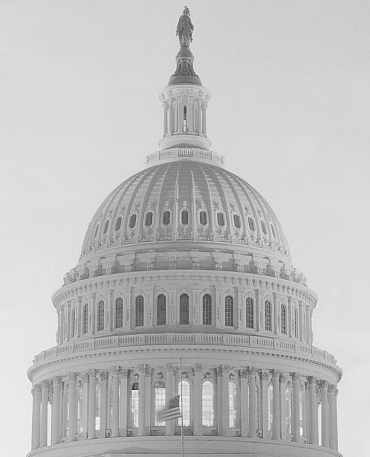

In [11]:
Image.open('img.bmp')

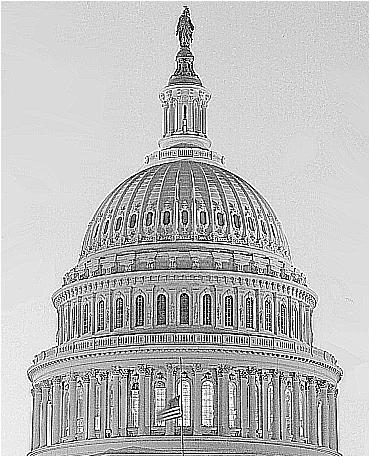

In [12]:
Image.open('filtered.bmp')

## Морфологическая обработка

In [5]:
class StructureElement:
    def __init__(self, data, size):
        self.data = data
        self.size = size


def erode(pixels, elm, img_size):
    pixels_new = pixels.copy()
    width, height = img_size

    for m in range(0, height):
        for n in range(0, width):
            condition = True
            for i, j in elm.data:
                x = m+i
                y = n+j
                if not (x < 0 or y < 0 or x >= height or y >= width):
                    if pixels[x][y] != True:
                        condition = False
                        break
                    
            if condition:
                pixels_new[m][n] = True # pixels[m][n] 
            else:
                pixels_new[m][n] = False # !!! False
    
    return pixels_new


def dilate(pixels, elm, img_size):
    pixels_new = pixels.copy()
    width, height = img_size

    for m in range(0, height):
        for n in range(0, width):

            if pixels[m][n] == True:
                for i, j in elm.data:
                    x = m+i
                    y = n+j
                    if not (x < 0 or y < 0 or x >= height or y >= width):
                        pixels_new[x][y] = True
    
    return pixels_new


elm1 = StructureElement(
    [
        (-1, -1), (-1, 0), (-1, 1),
        ( 0, -1), ( 0, 0), ( 0, 1),
        ( 1, -1), ( 1, 0), ( 1, 1),
    ],
    (3, 3)
)

elm2 = StructureElement(
    [
        (0, 0), (0, 1),
        (1, 0), (1, 1),
    ],
    (2, 2)
)

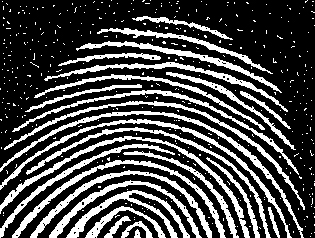

In [6]:
Image.open('img2.bmp')

### Дилатация

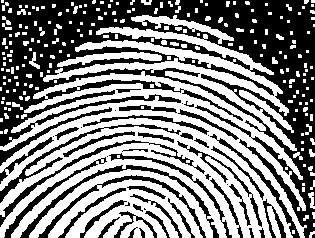

In [7]:
Image.open('dilated.bmp')

### Эрозия

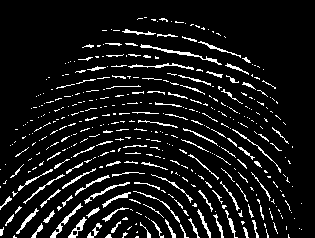

In [10]:
Image.open('eroded.bmp')